# Test for consensus

This notebook provides a detailed record of the server-side implementation for consensus testing.
Here, we define the weighted matrix of the graph as:
$$
W = I - 0.45L
$$
where $L$ is the Laplacian matrix of a ring topology with $5$ nodes.


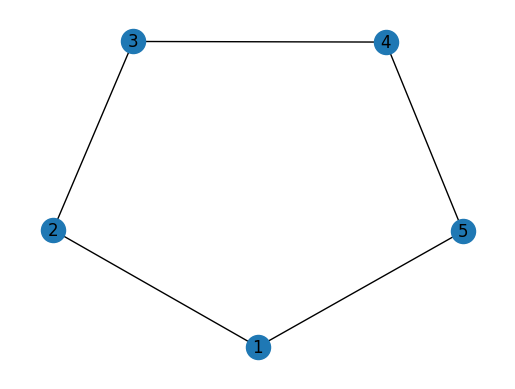

INFO:topolink.Graph:Server running on 172.20.33.166:5555
INFO:topolink.Graph:Node 4 registered with address 172.20.33.166:35589
INFO:topolink.Graph:Node 2 registered with address 172.20.33.166:41543
INFO:topolink.Graph:Node 5 registered with address 172.20.33.166:45671
INFO:topolink.Graph:Node 1 registered with address 172.20.33.166:43359
INFO:topolink.Graph:Node 3 registered with address 172.20.33.166:33023
INFO:topolink.Graph:All nodes registered. Server is now ready.
INFO:topolink.Graph:Sent neighbor information to all nodes.
INFO:topolink.Graph:Node 1 has unregistered.
INFO:topolink.Graph:Node 3 has unregistered.
INFO:topolink.Graph:Node 5 has unregistered.
INFO:topolink.Graph:Node 4 has unregistered.
INFO:topolink.Graph:Node 2 has unregistered.


In [1]:
def server() -> None:
    from logging import basicConfig, INFO
    import matplotlib.pyplot as plt

    basicConfig(level=INFO)

    from numpy import array, eye
    from topolink import Graph

    L = array(
        [
            [2, -1, 0, 0, -1],
            [-1, 2, -1, 0, 0],
            [0, -1, 2, -1, 0],
            [0, 0, -1, 2, -1],
            [-1, 0, 0, -1, 2],
        ]
    )
    W = eye(5) - L * 0.45

    graph = Graph.from_mixing_matrix(W, address="localhost:5555")

    _, ax = plt.subplots()

    graph.draw(ax)

    plt.show()

    graph.deploy()


server()